 # **MILESTONE 2**

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [10]:
# Load the dataset
df = pd.read_csv('C:/Users/divya/Downloads/product+classification+and+clustering/pricerunner_aggregate.csv')  # Use actual path


In [11]:
# Normalize the selected features for clustering
features = [' Cluster ID', ' Category ID']  # Update based on exact numeric columns
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

## Principal Component Analysis (PCA)

The data is made less dimensional by using Principal Component Analysis (PCA) to streamline the clustering process and enhance visualization.
PCA maintains as much variety as feasible when projecting high-dimensional data onto a two-dimensional environment.
They are better able to visualize the clusters as a result.




In [12]:
# Apply PCA for dimensionality reduction (to 2D for visualization)
pca = PCA(n_components=2)
df[['PCA1', 'PCA2']] = pca.fit_transform(df[features])

## K-means Clustering

K-means clustering is used in this section to organize products into clusters according to their shared characteristics.
An iterative technique called K-means reduces the variation within each cluster.
I allocated each product to a cluster after setting the number of clusters to three (or any other amount determined by the project needs).


In [13]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[features])


## Hierarchical Clustering

Here, I used Hierarchical Clustering to put products into groups according to how similar their features are.
This technique creates a hierarchy of clusters that a dendrogram may show.
To match the K-means results for comparison, we set the number of clusters to three.


In [14]:
# Apply Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df[features])

## Cluster Visualization with Seaborn

A scatter plot of the clusters produced by the K-means algorithm is made using Seaborn.
A product is represented by each point, and the principle components from PCA are represented by the x- and y-axes.
Color-coding products according to their cluster assignments allows us to visually distinguish different clusters.


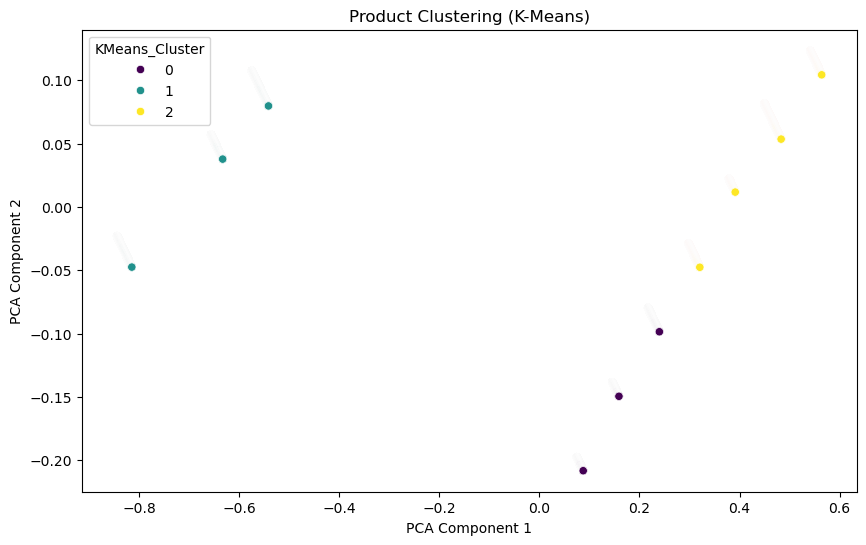

In [6]:
# Visualization with Seaborn (K-means clusters)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis')
plt.title('Product Clustering (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## Interactive Visualization with Plotly

Here, a Hierarchical Clustering interactive scatter plot is made using Plotly.
With colors denoting cluster assignments and each point representing a product, this enables dynamic cluster exploration.
The cluster analysis is easier to understand when users can hover over points to get product details.


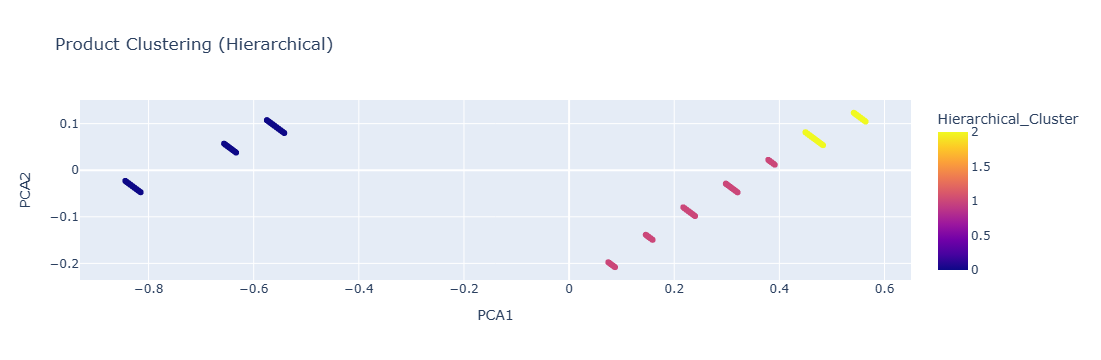

In [7]:
# Visualization with Plotly (Hierarchical clusters)
fig = px.scatter(df, x='PCA1', y='PCA2', color='Hierarchical_Cluster',
                 title='Product Clustering (Hierarchical)')
fig.show()